## Observations and Insights 

-	Among all the tested drug regimens, Capomulin and Ramicane recorded most of the timepoint counts. Capomuli has 230 counts of timepoint recorded, Ramicane has 178 counts of timepoint recorded.
-	The sex distribution among all of mice tested in the study is evenly distributed, female and male distribution percentage is 49.6% and 50.4% correspondingly. 
-	Among four chosen drug regimens, the data regarding tumor size and Weight of the mouse are normally distributed. Only exception is drug Infubinol, which shows 1 outlier based on the analysis.
-	Sample study on the mouse y793 under the drug Capomulin shows steady reduce on the tumor size over the course of 45 days .
-	The tumor size and body weight appear to have strong positive correlation. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df=pd.merge(mouse_metadata,study_results, on="Mouse ID",how="outer")
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the raw dataset.
micecount=merge_df["Mouse ID"].unique()
micecount=len(micecount)
print(f"There are {micecount} mice in the dataset" )

There are 249 mice in the dataset


In [3]:
# Creating a DataFrame object to check duplicated mouse ID
duplicates_id = pd.DataFrame(merge_df, 
                  columns = ['Mouse ID','Timepoint'])
  
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_id=duplicates_id[merge_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
    
# Print the resultant Dataframe
duplicates_id

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
only_duplicates_id=merge_df.loc[merge_df["Mouse ID"]=="g989"]
print (only_duplicates_id)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df.loc[merge_df["Mouse ID"]!="g989"]
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [6]:
clean_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [7]:
# Checking the number of mice in the clean DataFrame.
micecount_clean=clean_df["Mouse ID"].unique()
micecount_clean=len(micecount_clean)
print(f"There are {micecount_clean} mice left after removing duplicates in the dataset" )

There are 248 mice left after removing duplicates in the dataset


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [8]:
#groupby using "Drug Regimen"and "Timepoint", calculate stats on "Tumor Volume"
grouped_clean_df=clean_df.groupby(['Drug Regimen','Timepoint'])
grouped_Tumor_mean=grouped_clean_df['Tumor Volume (mm3)'].mean()
grouped_Tumor_median=grouped_clean_df['Tumor Volume (mm3)'].median()
grouped_Tumor_var=grouped_clean_df['Tumor Volume (mm3)'].var()
grouped_Tumor_std=grouped_clean_df['Tumor Volume (mm3)'].std()
grouped_Tumor_sem=grouped_clean_df['Tumor Volume (mm3)'].sem()

In [9]:
# Generate a summary statistics table
summary_stats= pd.DataFrame({"mean": grouped_Tumor_mean,"median": grouped_Tumor_median,"variance":grouped_Tumor_var, "standard deviation":grouped_Tumor_std,"SEM":grouped_Tumor_sem})
summary_stats

mean     median   variance  standard deviation  \
Drug Regimen Timepoint                                                        
Capomulin    0          45.000000  45.000000   0.000000            0.000000   
             5          44.266086  45.597064   5.030889            2.242964   
             10         43.084291  43.421014  12.344133            3.513422   
             15         42.064317  42.798160  16.878693            4.108369   
             20         40.716325  40.716428  19.035028            4.362915   
...                           ...        ...        ...                 ...   
Zoniferol    25         55.432935  55.676604   5.808348            2.410052   
             30         57.713531  57.419744   9.601024            3.098552   
             35         60.089372  60.365832  10.876760            3.297993   
             40         62.916692  62.274543  13.958456            3.736102   
             45         65.960888  65.684689  14.100301            3.755037   

                             SEM  
Drug Regimen Timepoint            
Capomulin    0          0.000000  
             5          0.448593  
             10         0.702684  
             15         0.838617  
             20         0.909731  
...                          ...  
Zoniferol    25         0.602513  
             30         0.800043  
             35         0.881426  
             40         0.998515  
             45         1.003576  

[100 rows x 5 columns]

In [10]:
# Using the aggregation method, produce the same summary statistics in a single line

grouped_clean_df=clean_df.groupby(['Drug Regimen','Timepoint'])
grouped_clean_df.aggregate({"Tumor Volume (mm3)":['mean', 'median','var','std','sem']})

Tumor Volume (mm3)                                  \
                                     mean     median        var       std   
Drug Regimen Timepoint                                                      
Capomulin    0                  45.000000  45.000000   0.000000  0.000000   
             5                  44.266086  45.597064   5.030889  2.242964   
             10                 43.084291  43.421014  12.344133  3.513422   
             15                 42.064317  42.798160  16.878693  4.108369   
             20                 40.716325  40.716428  19.035028  4.362915   
...                                   ...        ...        ...       ...   
Zoniferol    25                 55.432935  55.676604   5.808348  2.410052   
             30                 57.713531  57.419744   9.601024  3.098552   
             35                 60.089372  60.365832  10.876760  3.297993   
             40                 62.916692  62.274543  13.958456  3.736102   
             45                 65.960888  65.684689  14.100301  3.755037   

                                  
                             sem  
Drug Regimen Timepoint            
Capomulin    0          0.000000  
             5          0.448593  
             10         0.702684  
             15         0.838617  
             20         0.909731  
...                          ...  
Zoniferol    25         0.602513  
             30         0.800043  
             35         0.881426  
             40         0.998515  
             45         1.003576  

[100 rows x 5 columns]

## Bar and Pie Charts

In [11]:
grouped_Regimen=clean_df.groupby(['Drug Regimen'])
grouped_Regimen_count=grouped_Regimen['Timepoint'].count()
grouped_Regimen_chart=pd.DataFrame({"Timepoint count": grouped_Regimen_count})
grouped_Regimen_chart

,Timepoint count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


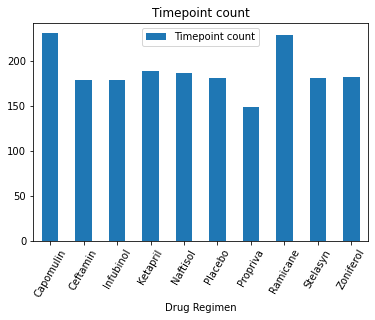

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using dataframe plot.
Regimen_df_plot=grouped_Regimen_chart.plot.bar(title="Timepoint count",rot=60)
Regimen_df_plot

Text(0.5, 0, 'Drug Regimen')

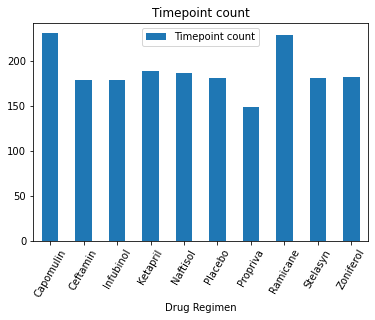

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Regimen_py_plot=grouped_Regimen_chart.plot(kind="bar",title="Timepoint count",rot=60)
Regimen_py_plot.set_xlabel("Drug Regimen")


In [14]:
# count percentage male vs female
gender_df=clean_df[["Mouse ID","Sex"]]
gender_df=gender_df.drop_duplicates("Mouse ID",keep='first')

gender_count = pd.DataFrame({"Gender distribution": gender_df["Sex"].value_counts()})

gender_count

,Gender distribution
Male,125
Female,123


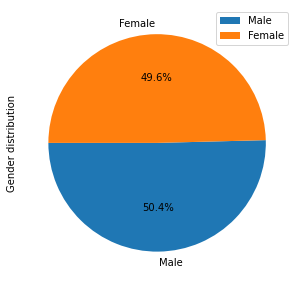

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df_plot=gender_count.plot.pie(y="Gender distribution",autopct="%1.01f%%",figsize=(10, 5),startangle=180)

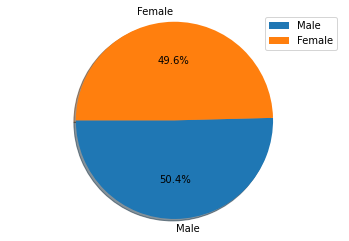

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

fig1, ax1 = plt.subplots()
gender_py_plot=ax1.pie(gender_count["Gender distribution"],labels=gender_count.index,autopct="%1.01f%%",shadow=True, startangle=180)
ax1.axis('equal')
ax1.legend(labels=gender_count.index, loc=1)

plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# check the original mouse_metadata df
 mouse_metadata.head()


In [24]:
#sort original mouse_metadata df by mouse ID and Drug Regimen
mouse_metadata_sorted = mouse_metadata.sort_values(["Mouse ID", "Drug Regimen"], ascending = (False, False))
mouse_metadata_sorted

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
248,z969,Naftisol,Male,9,30
247,z795,Naftisol,Female,13,29
246,z581,Infubinol,Female,24,25
8,z578,Ramicane,Male,11,16
245,z435,Propriva,Female,12,26
...,...,...,...,...,...
53,a366,Stelasyn,Female,16,29
52,a275,Ceftamin,Female,20,28
51,a262,Placebo,Female,17,29
50,a251,Infubinol,Female,21,25


In [ ]:
# check the original study_results df
# study_results.head()

In [25]:
# sort original study_results df by mouse ID and timepoint, sort them by desending order, only keep the first value, 
# i.e the last timepoint of a mouse  set new df study_results_sorted
study_results_sorted = study_results.sort_values(["Mouse ID", "Timepoint"], ascending = (False, False))
study_results_sorted=study_results_sorted.drop_duplicates("Mouse ID",keep='first')
study_results_sorted

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
1869,z969,45,73.867845,4
1887,z795,45,65.741070,3
1784,z581,45,62.754451,3
1799,z578,45,30.638696,0
499,z435,10,48.710661,0
...,...,...,...,...
1401,a366,30,63.440686,1
1856,a275,45,62.999356,3
1783,a262,45,70.717621,4
1786,a251,45,65.525743,1


In [26]:
#merge both sorted df 
merge_regimens_df=pd.merge(mouse_metadata_sorted,study_results_sorted, on="Mouse ID",how="inner")
merge_regimens_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,z969,Naftisol,Male,9,30,45,73.867845,4
1,z795,Naftisol,Female,13,29,45,65.741070,3
2,z581,Infubinol,Female,24,25,45,62.754451,3
3,z578,Ramicane,Male,11,16,45,30.638696,0
4,z435,Propriva,Female,12,26,10,48.710661,0
...,...,...,...,...,...,...,...,...
244,a366,Stelasyn,Female,16,29,30,63.440686,1
245,a275,Ceftamin,Female,20,28,45,62.999356,3
246,a262,Placebo,Female,17,29,45,70.717621,4
247,a251,Infubinol,Female,21,25,45,65.525743,1


In [27]:
#set new df merge_regimens_index use Drug Regimen as index
merge_regimens_index=merge_regimens_df.set_index("Drug Regimen")
merge_regimens_index.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Naftisol,z969,Male,9,30,45,73.867845,4
Naftisol,z795,Female,13,29,45,65.741070,3
Infubinol,z581,Female,24,25,45,62.754451,3
Ramicane,z578,Male,11,16,45,30.638696,0
Propriva,z435,Female,12,26,10,48.710661,0


In [28]:
#bring out data related to four regimens by loc through index
specified_refimens =merge_regimens_index.loc[["Capomulin","Ramicane","Infubinol","Ceftamin"],["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
#reset index for the new df
specified_refimens=specified_refimens.reset_index()
specified_refimens

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,y793,45,31.896238
1,Capomulin,x401,45,28.484033
2,Capomulin,w914,45,36.041047
3,Capomulin,w150,10,39.952347
4,Capomulin,v923,45,40.658124
...,...,...,...,...
95,Ceftamin,f436,15,48.722078
96,Ceftamin,b759,30,55.742829
97,Ceftamin,b487,25,56.057749
98,Ceftamin,b447,0,45.000000


In [29]:
# to put treatments regimens into a list
regimenlist=specified_refimens["Drug Regimen"].unique()
regimenlist

array(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], dtype=object)

for Capomulin no outlier exist
for Ramicane no outlier exist
for Infubinol the potential outlier is 69    36.321346
Name: Tumor Volume (mm3), dtype: float64.value
for Ceftamin no outlier exist


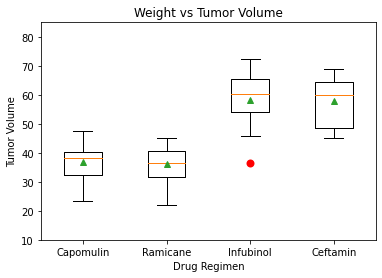

In [66]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_sizes=[]

# loop through specified_refimens df via each regimen, pull related tumor volume data into the tumor_size list
for i in regimenlist:
    tumor_loop=specified_refimens.loc[specified_refimens["Drug Regimen"]==i,"Tumor Volume (mm3)"]
    tumor_sizes.append(tumor_loop)
    
    #set quartiles,iqr, lower_bound and upper_bound
    
    quartiles=tumor_loop.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq

    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)

    #look for potential outliers, print out the outlier if exist, if not, print no outlier exist
    outlier_tumor_volumn=tumor_loop.loc[(tumor_loop<lower_bound)|(tumor_loop>upper_bound)]
    if outlier_tumor_volumn.size>0:

        print(f'for {i} the potential outlier is {outlier_tumor_volumn}.value')
    else:
        print(f'for {i} no outlier exist')
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1,ax1=plt.subplots(); 
#set the outlier mark and style to appear in the chart
outliermark = dict(marker='o', markerfacecolor='red', markersize=8,markeredgecolor='none')                
ax1.boxplot(tumor_sizes,showmeans=True,flierprops=outliermark);
ax1.set_title('Weight vs Tumor Volume')
ax1.set_xlabel("Drug Regimen");
ax1.set_ylim(10,85);
#plot tick the drug regimen to the tick location
ax1.set_ylabel("Tumor Volume");
tick_locations = np.array([1,2,3,4]);
plt.xticks(tick_locations,['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']);


## Line and Scatter Plots

In [ ]:
#show clear dataframe
clean_df.head()

In [35]:
# set index to"Mouse ID","Drug Regimen"
id_regimen=clean_df.set_index(["Mouse ID","Drug Regimen"])
# look for "Mouse ID"=y793,"Drug Regimen"=Capomulin
Capomulin_y793=id_regimen.loc[["y793","Capomulin"],["Timepoint","Tumor Volume (mm3)"]]
Capomulin_y793=pd.DataFrame(Capomulin_y793)
Capomulin_y793

Timepoint  Tumor Volume (mm3)
Mouse ID Drug Regimen                               
y793     Capomulin             0           45.000000
         Capomulin             5           41.019913
         Capomulin            10           41.630010
         Capomulin            15           42.283665
         Capomulin            20           40.716428
         Capomulin            25           38.992734
         Capomulin            30           35.726023
         Capomulin            35           36.327870
         Capomulin            40           31.475411
         Capomulin            45           31.896238

In [36]:
#reset index for dataframe Capomulin_y793
Capomulin_y793=Capomulin_y793.reset_index()
Capomulin_y793

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,y793,Capomulin,0,45.000000
1,y793,Capomulin,5,41.019913
2,y793,Capomulin,10,41.630010
3,y793,Capomulin,15,42.283665
4,y793,Capomulin,20,40.716428
5,y793,Capomulin,25,38.992734
6,y793,Capomulin,30,35.726023
7,y793,Capomulin,35,36.327870
8,y793,Capomulin,40,31.475411
9,y793,Capomulin,45,31.896238


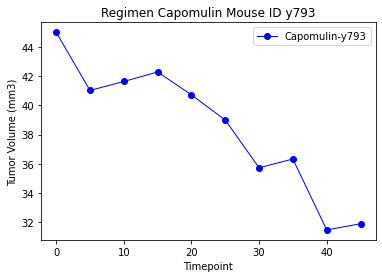

In [37]:
# Generate a line plot of tumor volume vs. time point for mouse y793 treated with Capomulin
fig,ax=plt.subplots()
x_axis_data=Capomulin_y793["Timepoint"]
y_axis_data=Capomulin_y793["Tumor Volume (mm3)"]
plt.plot(x_axis_data,y_axis_data,marker="o",color="blue",linewidth=1,label="Capomulin-y793")
plt.legend(loc="best")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Regimen Capomulin Mouse ID y793")
plt.show()

## Correlation and Regression

In [ ]:
weight_regimen=clean_df.set_index(["Drug Regimen"])

weight_regimen.head()

In [38]:
# go through the weight_regimen and filter out all mouses under drug regimen Capomulin
weight_regimen=clean_df.set_index(["Drug Regimen"])
Capomulin_weight=weight_regimen.loc[["Capomulin"],["Mouse ID","Timepoint","Tumor Volume (mm3)","Weight (g)"]]

Capomulin_weight.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Weight (g)
Drug Regimen,,,,
Capomulin,s185,0,45.000000,17
Capomulin,s185,5,43.878496,17
Capomulin,s185,10,37.614948,17
Capomulin,s185,15,38.177232,17
Capomulin,s185,20,36.866876,17


In [39]:
#group by mouse id
Capomulin_weight=Capomulin_weight.groupby(['Mouse ID'])
Capomulin_weight

In [40]:
#calculate the average tumor size for mouse under drug regimen Capomulin
Average_Tvolume=Capomulin_weight["Tumor Volume (mm3)"].mean()
Average_Weight=Capomulin_weight["Weight (g)"].mean()

In [42]:
#set a df to show mouse weight and tumor size under drug regimen Capomulin
Capomulin_weight_volume = pd.DataFrame(
    {"Weight (g)": Average_Weight,"Average Tumor volume":Average_Tvolume})
Capomulin_weight_volume.head()

,Weight (g),Average Tumor volume
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


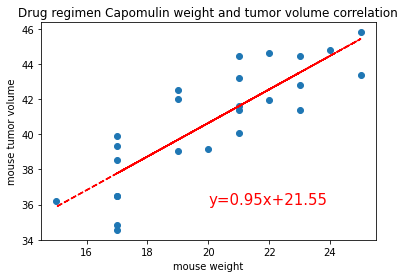

the correlation between weight and tumor volume is 0.84


In [43]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
volume=Capomulin_weight_volume.iloc[:,1]
weight=Capomulin_weight_volume.iloc[:,0]
correlation=st.pearsonr(weight,volume)

slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, volume)
regress_values=weight*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(weight,volume)
plt.plot(weight,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("mouse weight")
plt.ylabel("mouse tumor volume")
plt.title("Drug regimen Capomulin weight and tumor volume correlation")
plt.show()  
print(f"the correlation between weight and tumor volume is {round(correlation[0],2)}")
   